In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

from ccn import Constraint, ConstraintsGroup
from shapes import Rectangle
from experiment import Experiment

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


### Define the shapes

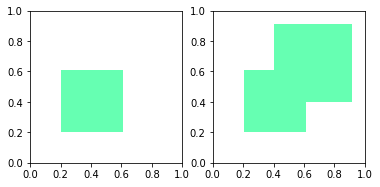

In [3]:
rect0 = Rectangle(0.2, 0.6, 0.2, 0.6)
rect1 = Rectangle(0.4, 0.9, 0.4, 0.9)
combined = rect0 | rect1
shapes = [rect0, combined]

fig, ax = plt.subplots(1, len(shapes))
for i, shape in enumerate(shapes):
  shape.plot(ax[i], full=True)
plt.show()

constraints1 = [ConstraintsGroup([Constraint('1 :- 0')])]
constraints2 = [ConstraintsGroup([Constraint('n0 :- n1')])]

### Define the neural network

In [4]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear = nn.Sequential(
            nn.Linear(2, 4),
            nn.Tanh(),
            nn.Linear(4, 2),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.linear(x)
        return x

model1 = NeuralNetwork()
model2 = NeuralNetwork()
print(model1)

NeuralNetwork(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): Tanh()
    (2): Linear(in_features=4, out_features=2, bias=True)
    (3): Sigmoid()
  )
)


### Train and test the model

env: CUDA_LAUNCH_BLOCKING=1
Epoch 1, Ratio 0.2
-----------------------
loss: 0.271700 [    0/10000]
loss: 0.215787 [ 6400/10000]
Test Error: 
 Accuracy: 92.2%, 90.2%
 Avg loss: 0.004440 

Epoch 2, Ratio 0.4
-----------------------
loss: 0.227269 [    0/10000]
loss: 0.179549 [ 6400/10000]
Test Error: 
 Accuracy: 94.8%, 90.5%
 Avg loss: 0.004210 

Epoch 3, Ratio 0.6
-----------------------
loss: 0.192914 [    0/10000]
loss: 0.154861 [ 6400/10000]
Test Error: 
 Accuracy: 95.9%, 88.6%
 Avg loss: 0.004084 

Epoch 4, Ratio 0.8
-----------------------
loss: 0.272763 [    0/10000]
loss: 0.223872 [ 6400/10000]
Test Error: 
 Accuracy: 95.5%, 92.2%
 Avg loss: 0.003423 

Epoch 5, Ratio 1.0
-----------------------
loss: 0.222025 [    0/10000]
loss: 0.209505 [ 6400/10000]
Test Error: 
 Accuracy: 95.6%, 92.8%
 Avg loss: 0.003224 

Epoch 6, Ratio 1.0
-----------------------
loss: 0.210807 [    0/10000]
loss: 0.201229 [ 6400/10000]
Test Error: 
 Accuracy: 96.0%, 93.1%
 Avg loss: 0.003093 

Epoch 7, Rat

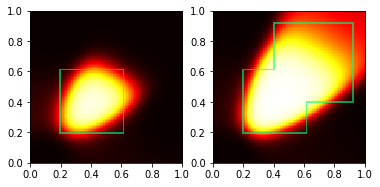

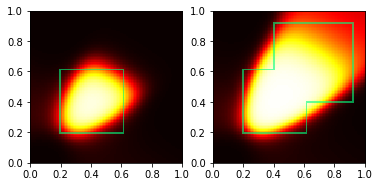

In [6]:
%env CUDA_LAUNCH_BLOCKING=1
experiment = Experiment('rectangles', model1, shapes, constraints1)
experiment.run(100, 'cpu', progressive=0.5)
#experiment.save(dir='./models/')

Epoch 1
-------------------------------
loss: 0.703867 [    0/10000]
loss: 0.547848 [ 6400/10000]
Test Error: 
 Accuracy: 84.2%, 64.0%
 Avg loss: 0.008565 

Epoch 2
-------------------------------
loss: 0.530661 [    0/10000]
loss: 0.496934 [ 6400/10000]
Test Error: 
 Accuracy: 84.2%, 65.5%
 Avg loss: 0.007873 

Epoch 3
-------------------------------
loss: 0.466750 [    0/10000]
loss: 0.482974 [ 6400/10000]
Test Error: 
 Accuracy: 84.2%, 66.6%
 Avg loss: 0.007789 

Epoch 4
-------------------------------
loss: 0.458864 [    0/10000]
loss: 0.479520 [ 6400/10000]
Test Error: 
 Accuracy: 84.2%, 66.8%
 Avg loss: 0.007762 

Epoch 5
-------------------------------
loss: 0.455886 [    0/10000]
loss: 0.478118 [ 6400/10000]
Test Error: 
 Accuracy: 84.2%, 66.7%
 Avg loss: 0.007744 

Epoch 6
-------------------------------
loss: 0.454910 [    0/10000]
loss: 0.476138 [ 6400/10000]
Test Error: 
 Accuracy: 84.2%, 67.1%
 Avg loss: 0.007717 

Epoch 7
-------------------------------
loss: 0.451870 [  

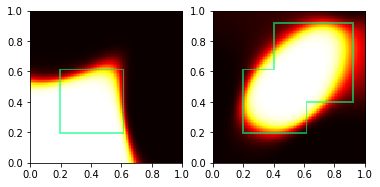

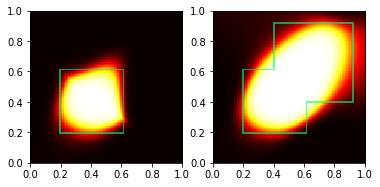

In [5]:
experiment = Experiment('rectangles-rev', model2, shapes, constraints2)
experiment.run(50, 'cpu')
#experiment.save(dir='./models/')